# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
betas_cols = list(np.arange(start=3, stop=28, step=1))

In [4]:
posteriors = pd.read_csv(os.path.join(results_path, 'entirefit_shared_revised.csv'), usecols=betas_cols)
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [5]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-0.397105,-0.194870,0.316236,0.128974,0.154222,-0.117765,-0.026673,0.120120,0.208863,-0.134656,...,-0.356636,-0.041450,0.079107,0.303935,0.107095,-0.016013,0.106035,0.058011,-0.005693,0.126261
1,-0.757667,-0.496685,-0.052233,0.519258,0.126275,0.045385,-0.329884,0.010413,0.240491,-0.097891,...,-0.220006,0.236926,0.309683,0.208345,-0.149637,-0.150801,0.600006,-0.000444,-0.053970,0.052772
2,-0.421767,-0.125024,0.114187,0.090519,0.101611,-0.032514,-0.145407,0.044567,0.373646,-0.230988,...,-0.381661,-0.111515,0.487784,0.535465,-0.114212,-0.637064,-0.395866,0.033623,-0.253834,0.611863
3,-0.550013,-0.142418,0.387488,0.263945,0.047803,0.088508,0.150460,-0.137875,0.408583,-0.284732,...,-0.454898,-0.176893,0.402279,0.309496,-0.015659,-0.311234,0.039151,0.269218,-0.134387,0.155113
4,-0.658441,0.056102,0.748886,0.212013,0.061174,0.138914,-0.275522,-0.027611,0.256409,-0.184404,...,-0.242215,-0.026952,0.739789,0.125460,-0.284416,-0.448519,0.052980,0.182333,-0.251785,0.564915
5,-0.684723,0.116574,0.009108,0.759555,-0.135952,-0.266953,0.003892,0.681642,0.239719,-0.115600,...,-0.407780,0.536807,-0.385539,0.379343,0.233505,-0.144144,0.601604,1.199421,0.037672,0.064715
6,-0.458204,0.132316,0.063740,0.596030,-0.190642,-0.211229,-0.065714,0.483554,0.194551,-0.099710,...,-0.337407,0.304123,-0.482063,0.368734,0.188225,-0.074355,0.565753,1.184431,-0.152084,-0.028585
7,-0.565531,0.643321,0.428063,0.162679,-0.028586,-0.278250,0.441962,-0.346010,0.223280,-0.187892,...,-0.758128,-0.552177,0.916275,-0.513511,0.315622,-0.548916,0.134045,-0.904024,-0.286866,0.520685
8,-0.709991,-0.709725,0.677386,0.406678,0.176781,0.056871,0.003406,-0.053297,0.435398,-0.220336,...,-0.564046,-0.351314,-0.305667,-0.275322,0.407736,-0.392692,0.113715,-0.194146,-0.165076,0.233114
9,-0.536554,0.449580,-0.562006,0.242904,-0.001944,0.081269,-0.076538,-0.183305,0.257307,-0.199956,...,-0.174228,0.058469,0.116461,0.329356,-0.378300,-0.317007,0.084765,0.125118,-0.227525,0.192965


In [6]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [7]:
param_short = parameters.iloc[:900]

In [8]:
param_short.describe()

,LOG_STELLAR_MASS,Z
count,900.000000,900.000000
mean,10.000000,0.208120
std,0.597259,0.083724
min,9.000000,0.067940
25%,9.482759,0.135613
50%,10.000000,0.208120
75%,10.517241,0.280627
max,11.000000,0.348300


# Posteriors

In [9]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3']*5
figsize      = (20, 20)
alpha        = 0.4

In [10]:
columns = list(posteriors.keys())

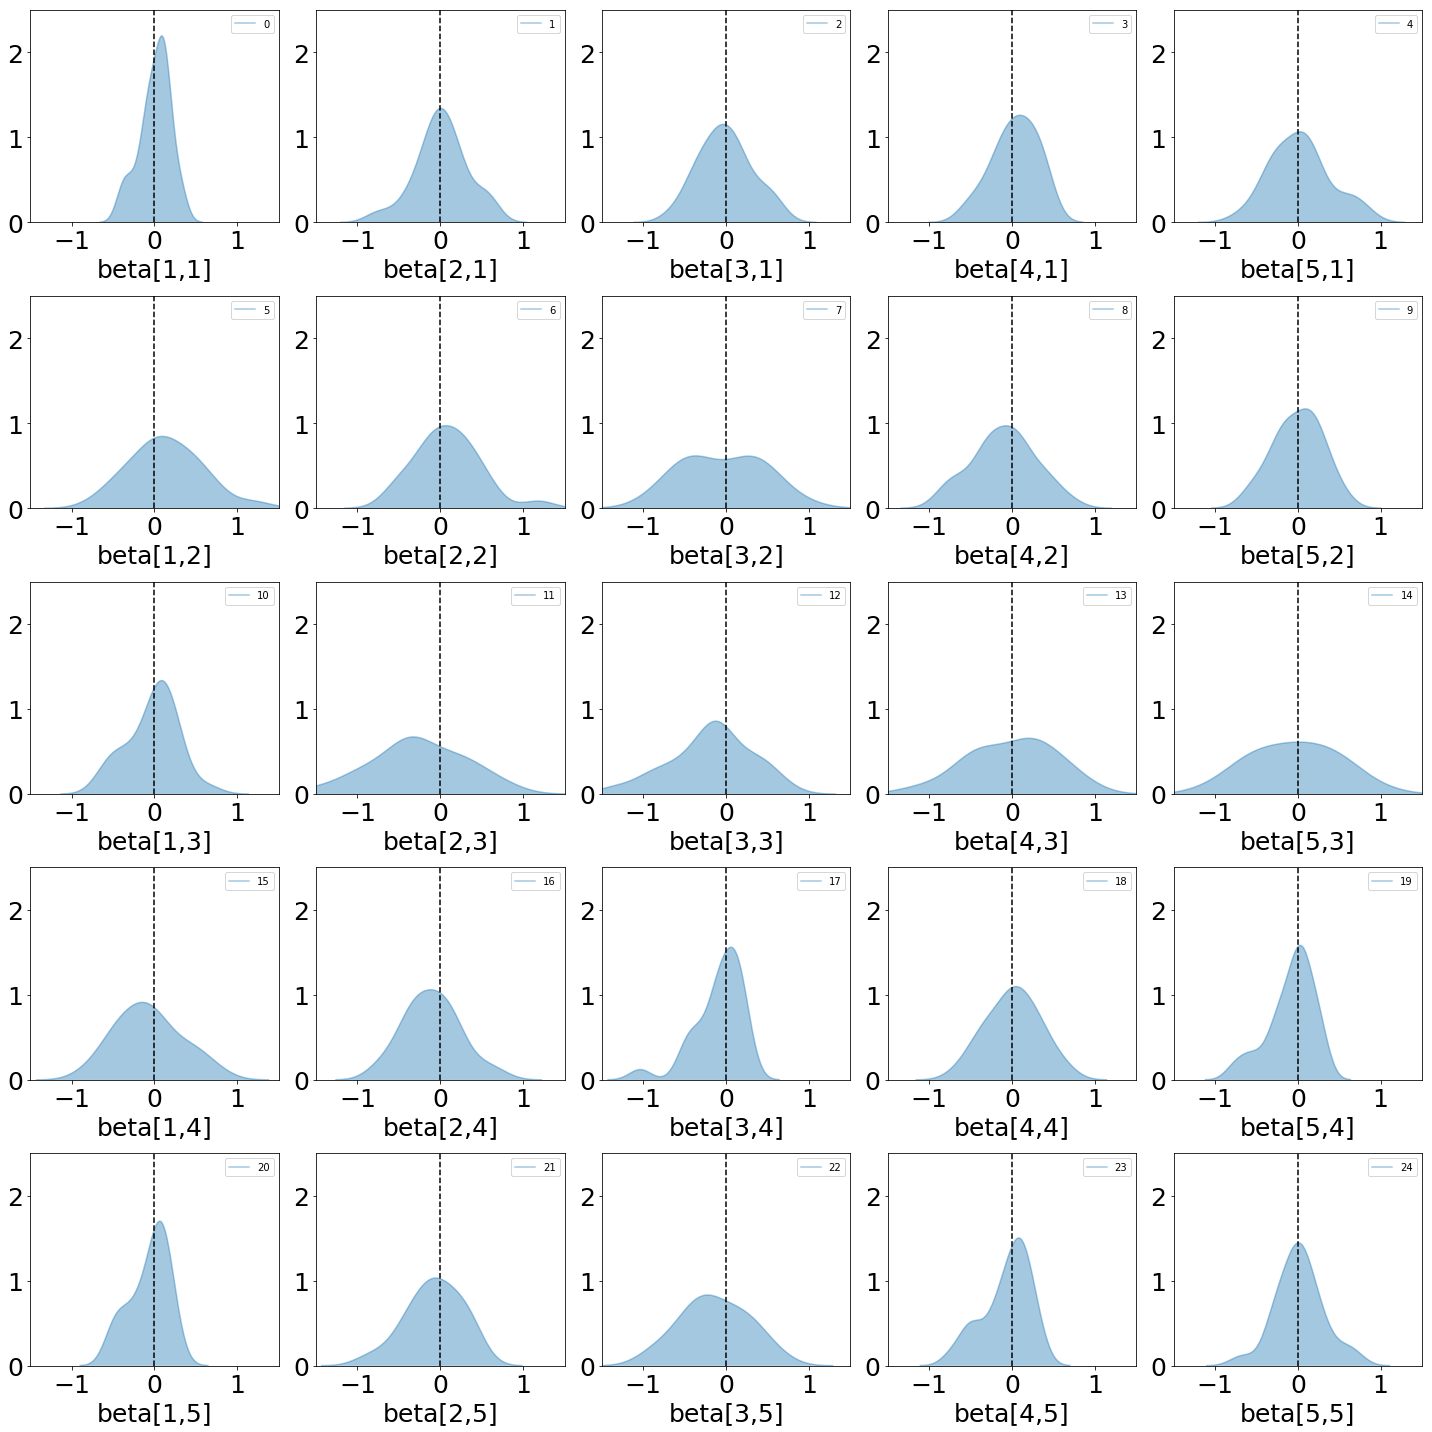

In [16]:
plt.subplots(figsize=figsize)
position = 1
for i in range(len(columns)):
    plot = plt.subplot(5, 5, position)
    sns.kdeplot(posteriors.iloc[i], shade=True, alpha=alpha)
    plt.xlabel(r"%s" % str(columns[i]), fontsize=25)
    plt.axvline(x=0, linestyle="--", color='black')
    plt.tick_params('both', labelsize='25')
    plt.xlim([-1.5,1.5])
    plt.ylim([0,2.5])
    position+=1
#     if (i==0):
#         plt.ylabel("$\,$ WHAN \n %s" % whan_classes[position], fontsize=25)
    plt.tight_layout()
plt.show()